In [51]:
'''This script provides some basic stats on a few of the CSVs from the CPCSSN database'''
import pandas as pd
import numpy as np

#start with Lab results

Lab = pd.read_csv("Lab.csv")
Exam = pd.read_csv("Exam.csv")

labCols = Lab.columns
examCols = Exam.columns

#check column headers
print(labCols, '\n')
print(examCols)


Index(['Lab_ID', 'Network_ID', 'Site_ID', 'Patient_ID', 'OriginalEMRID',
       'Encounter_ID', 'PerformedDate', 'Name_orig', 'Name_calc',
       'CodeType_orig', 'CodeType_calc', 'Code_orig', 'Code_calc',
       'TestResult_orig', 'TestResult_calc', 'UpperNormal', 'LowerNormal',
       'NormalRange', 'UnitOfMeasure_orig', 'UnitOfMeasure_calc',
       'DateCreated', 'TempCol', 'TempTestResult'],
      dtype='object') 

Index(['Exam_ID', 'Network_ID', 'Site_ID', 'Patient_ID', 'OriginalEMRID',
       'Encounter_ID', 'Exam1', 'Result1_orig', 'Result1_calc', 'Exam2',
       'Result2_orig', 'Result2_calc', 'UnitOfMeasure_orig',
       'UnitOfMeasure_calc', 'PairingMethod', 'DateCreated'],
      dtype='object')


In [52]:
#start with number of entries, patients and test results per patient
print("Number of lab results: %d" % len(Lab))
print("Number of exam results: %d\n" % len(Exam))

labPatients = []
labPatientCounts = {}
for index, row in Lab.iterrows():
    patient = str(row['Patient_ID'])
    try:
        temp = labPatients.index(patient)
    except:
        labPatients.append(patient)
    if patient not in labPatientCounts.keys():
        labPatientCounts[patient] = 1;
    else:
        labPatientCounts[patient] += 1;

print("Number of lab patients %d" % len(labPatients))
print("Range of lab results per patient: ", min(labPatientCounts.values()), max(labPatientCounts.values()), '\n')

examPatients = []
examPatientCounts = {}
for index, row in Exam.iterrows():
    patient = str(row['Patient_ID'])
    try:
        temp = examPatients.index(patient)
    except:
        examPatients.append(patient)
    if patient not in examPatientCounts.keys():
        examPatientCounts[patient] = 1;
    else:
        examPatientCounts[patient] += 1;

print("Number of exam patients %d" % len(examPatients))
print("Range of exam results per patient: ", min(examPatientCounts.values()), max(examPatientCounts.values()))

Number of lab results: 7621
Number of exam results: 2905

Number of lab patients 93
Range of lab results per patient:  1 330 

Number of exam patients 97
Range of exam results per patient:  3 123


In [53]:
import matplotlib.pyplot as plt

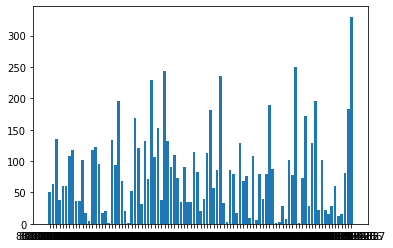

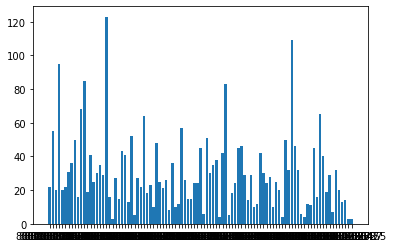

In [54]:
#Print plot of lab results per patient
patientCountsS = {k: v for k, v in sorted(labPatientCounts.items(), key=lambda item: item[1])}

plt.bar(range(len(labPatientCounts)), list(labPatientCounts.values()), align='center')
plt.xticks(range(len(labPatientCounts)), list(labPatientCounts.keys()))

plt.show()

#Print plot of exam results per patient
patientCountsS = {k: v for k, v in sorted(examPatientCounts.items(), key=lambda item: item[1])}

plt.bar(range(len(examPatientCounts)), list(examPatientCounts.values()), align='center')
plt.xticks(range(len(examPatientCounts)), list(examPatientCounts.keys()))

plt.show()

In [121]:
# Number of unique tests in Lab
# with orig names
uniqLabTestOrig = Lab['Name_orig'].unique()
print(np.sort(uniqLabTestOrig), "\n")

# with calc names
uniqLabTestCalc = Lab['Name_calc'].unique()
#remove any nan values
uniqLabTestCalc = [x for x in uniqLabTestCalc if str(x) != 'nan']

print(np.sort(uniqLabTestCalc), "\n")

#now list unique exam types in Exam

#exam 1
uniqExam1 = Exam['Exam1'].unique()
print(np.sort(uniqExam1), "\n")


#exam 2
uniqExam2 = Exam['Exam2'].unique()
#remove any nan values
uniqExam2 = [x for x in uniqExam2 if str(x) != 'nan']

print(np.sort(uniqExam2), "\n")

['Albumin/Creatinine' 'CHOLESTEROL' 'CREATINE KINASE' 'CREATININE'
 'CREATININE CLEARANCE' 'Cholesertol HDL' 'Cholesterol'
 'Cholesterol Fasting' 'Cholesterol HDL' 'Cholesterol Random' 'Creatinine'
 'Creatinine (serum)' 'GLUCOSE FASTING' 'GLUCOSE TOLERANCE'
 'GLUCOSE, FASTING' 'Glucose Fasting' 'Glucose Tolerance 75g' 'HDL'
 'HDL CHOL' 'HDL Cholesterol' 'HEMOCULT' 'HEMOGLBIN A1C' 'HbA1c'
 'Hemocult' 'Hemocult sp1 Stl Ql' 'Hemocult sp2 Stl Ql'
 'Hemocult sp3 Stl Ql' 'Hemoglobin' 'Hemoglobin A1c' 'INR' 'LDL'
 'LDL CALCULATED' 'LDL Cholesterol' 'TOTAL CHOLESTEROL' 'TRIGLYCERIDE'
 'TRIGLYCERIDES' 'TSH' 'TSH (Third Generation)' 'Total Cholesterol'
 'Triglyceride' 'Triglycerides' 'URINE ALBUMIN/CREATININE RATIO'] 

['Creatinine (serum)' 'FASTING GLUCOSE' 'GLUCOSE TOLERANCE' 'HBA1C' 'HDL'
 'Hemoglobin (Hb)' 'INR' 'LDL' 'TOTAL CHOLESTEROL' 'TRIGLYCERIDES' 'TSH'
 'URINE ALBUMIN CREATININE RATIO' 'eGFR/GFR'] 

['BMI (kg/m^2)' 'Height (cm)' 'Weight (kg)' 'sBP (mmHg)'] 

['dBP (mmHg)'] 



'\nfig, ax = plt.subplots()\ndf["datetime"].astype(np.int64).plot.hist(ax=ax)\nlabels = ax.get_xticks().tolist()\nlabels = pd.to_datetime(labels)\nax.set_xticklabels(labels, rotation=90)\nplt.show()'

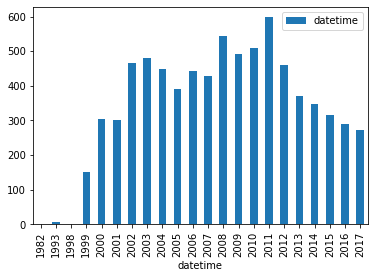

In [141]:
#Print a histogram of dates of lab results 
dates = pd.DatetimeIndex(Lab['PerformedDate'])
df = pd.DataFrame({"datetime": dates})

df.groupby(df["datetime"].dt.year).count().plot(kind="bar")
'''
fig, ax = plt.subplots()
df["datetime"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.show()'''

'\ndf = pd.DataFrame({"datetime": dates})\nfig, ax = plt.subplots()\ndf["datetime"].astype(np.int64).plot.hist(ax=ax)\nlabels = ax.get_xticks().tolist()\nlabels = pd.to_datetime(labels)\nax.set_xticklabels(labels, rotation=90)\nplt.show()'

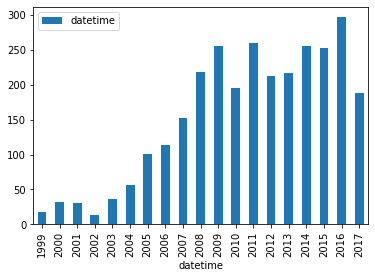

In [142]:
#Print a histogram of dates of exam results 
dates = pd.DatetimeIndex(Exam['DateCreated'])

df = pd.DataFrame({"datetime": dates})
df.groupby(df["datetime"].dt.year).count().plot(kind="bar")
'''
df = pd.DataFrame({"datetime": dates})
fig, ax = plt.subplots()
df["datetime"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.show()'''

In [145]:
#find the number of occurances of each type of lab result in the Lab CSV
test_freqs = {}
for test in uniqLabTestCalc:
    test_freqs[test] = [0,0]

for index, row in Lab.iterrows():
    test = str(row['Name_calc'])
    result = str(row['TestResult_orig'])
    if (test != 'nan'):
        test_freqs[test][0] += 1
        if (result != 'nan'):
            test_freqs[test][1] += 1
for key in test_freqs.keys():
    print("%s(with results/total):\t%d/%d" % (key, test_freqs[key][1], test_freqs[key][0]))
print()


#and number of occurances of each type of exam result in the Exam CSV
exam_freqs = {}
for exam in uniqExam1:
    exam_freqs[exam] = [0,0]
    
for exam in uniqExam2:
    exam_freqs[exam] = [0,0]

for index, row in Exam.iterrows():
    exam1 = str(row['Exam1'])
    result1 = str(row['Result1_orig'])
    exam2 = str(row['Exam2'])
    result2 = str(row['Result2_orig'])
    
    exam_freqs[exam1][0] += 1
    if (result1 != "nan"):
        exam_freqs[exam1][1] += 1
    
    if (exam2 != 'nan'):
        exam_freqs[exam2][0] += 1
        if (result2 != "nan"):
            exam_freqs[exam2][1] += 1
        
for key in exam_freqs.keys():
    print("%s (w.r./total):\t%d/%d" % (key, exam_freqs[key][1], exam_freqs[key][0]))
    

Hemoglobin (Hb)(with results/total):	266/267
Creatinine (serum)(with results/total):	1612/1612
HBA1C(with results/total):	671/672
FASTING GLUCOSE(with results/total):	573/573
URINE ALBUMIN CREATININE RATIO(with results/total):	325/326
HDL(with results/total):	611/611
LDL(with results/total):	555/560
TOTAL CHOLESTEROL(with results/total):	617/617
TRIGLYCERIDES(with results/total):	613/613
TSH(with results/total):	391/391
eGFR/GFR(with results/total):	7/7
GLUCOSE TOLERANCE(with results/total):	2/4
INR(with results/total):	946/950

sBP (mmHg) (w.r./total):	812/812
Weight (kg) (w.r./total):	782/782
Height (cm) (w.r./total):	671/671
BMI (kg/m^2) (w.r./total):	640/640
dBP (mmHg) (w.r./total):	808/812
